In [9]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle
import matplotlib.ticker as plticker
import mat73
import scipy.signal as sp
import time
import scipy.io
from IPython.display import clear_output
os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

#sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
#import lumapi
#sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/RessonanceRIng')) #Current directory


from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='notebook', ticks=True, grid=True)
plt.rcParams["figure.figsize"] = (15,7)

In [2]:
import numpy, scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = numpy.array(tt)
    yy = numpy.array(yy)
    ff = numpy.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(numpy.fft.fft(yy))
    guess_freq = abs(ff[numpy.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = numpy.std(yy) * 2.**0.5
    guess_offset = numpy.mean(yy)
    guess = numpy.array([guess_amp, 2.*numpy.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * numpy.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*numpy.pi)
    fitfunc = lambda t: A * numpy.sin(w*t + p) + c
    #return A
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": numpy.max(pcov), "rawres": (guess,popt,pcov)}

def linear(t,a,b):
    return a*t + b

In [11]:
inter = lumapi.INTERCONNECT(filename='Hibrid.icp')

dict_keys(['amp', 'omega', 'phase', 'offset', 'freq', 'period', 'fitfunc', 'maxcov', 'rawres'])


Text(0.5, 1.0, 'Sinais portas Q- e Q+')

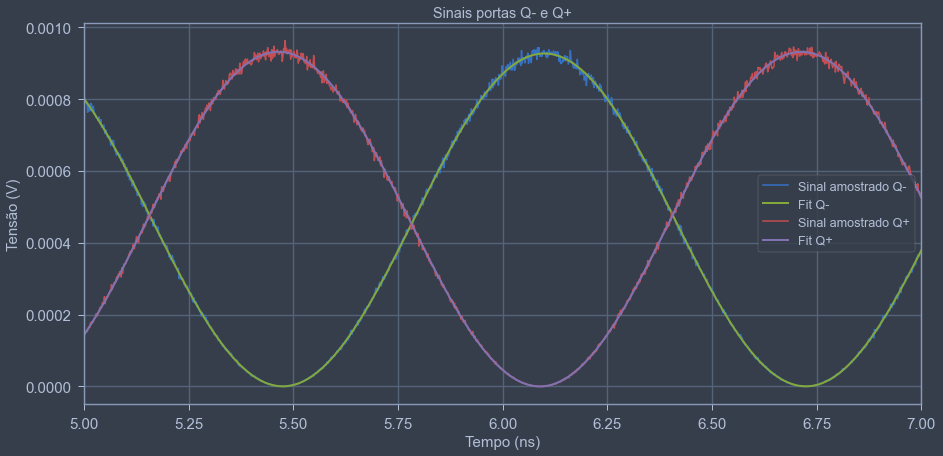

In [14]:
onda = inter.getresult('OSC_1','signal')

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)
print(fit.keys())
plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado Q-')
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo+fit['phase'])+fit['offset'],linewidth=2,label = 'Fit Q-')



onda = inter.getresult('OSC_2','signal')

fase = fit['phase']

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)

plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado Q+')
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo + fit['phase'])+fit['offset'],linewidth=2,label = 'Fit Q+')

plt.legend()
plt.xlim(5,7)
plt.xlabel(r'Tempo (ns)',fontsize =15)
plt.ylabel(r'Tensão (V)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()
plt.title('Sinais portas Q- e Q+')

dict_keys(['amp', 'omega', 'phase', 'offset', 'freq', 'period', 'fitfunc', 'maxcov', 'rawres'])
0.9766636619190773
dict_keys(['amp', 'omega', 'phase', 'offset', 'freq', 'period', 'fitfunc', 'maxcov', 'rawres'])
0.8048406766611956


Text(0.5, 1.0, 'Sinais portas I- e I+')

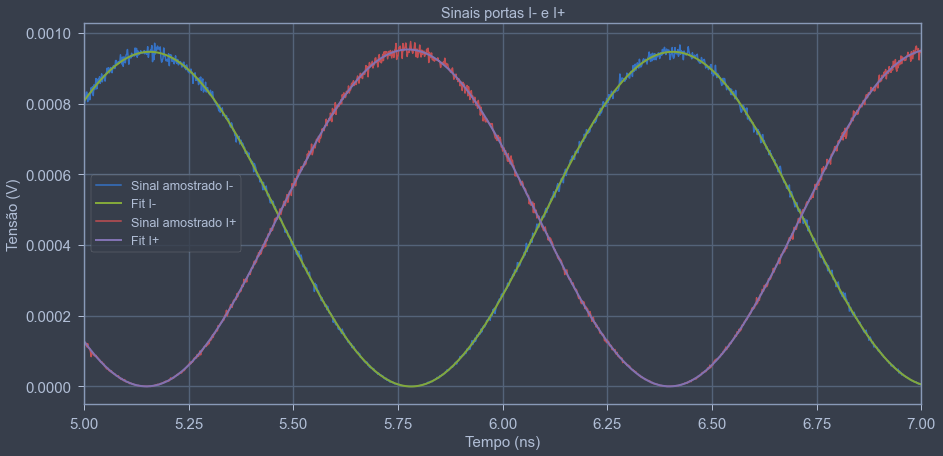

In [13]:
onda = inter.getresult('OSC_3','signal')

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)
print(fit.keys())
plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado I-')
print(np.sin(2*np.pi*fit['freq']+fit['phase'])+fit['offset'])
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo+fit['phase'])+fit['offset'],linewidth=2,label = 'Fit I-')


onda = inter.getresult('OSC_4','signal')

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)
print(fit.keys())
plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado I+')
print(np.sin(2*np.pi*fit['freq']+fit['phase'])+fit['offset'])
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo+fit['phase'])+fit['offset'],linewidth=2,label = 'Fit I+')

plt.legend()
plt.xlim(5,7)
plt.xlabel(r'Tempo (ns)',fontsize =15)
plt.ylabel(r'Tensão (V)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()
plt.title('Sinais portas I- e I+')

dict_keys(['amp', 'omega', 'phase', 'offset', 'freq', 'period', 'fitfunc', 'maxcov', 'rawres'])
-0.7110940037652878
dict_keys(['amp', 'omega', 'phase', 'offset', 'freq', 'period', 'fitfunc', 'maxcov', 'rawres'])


Text(0.5, 1.0, 'Sinais portas Q- e I-')

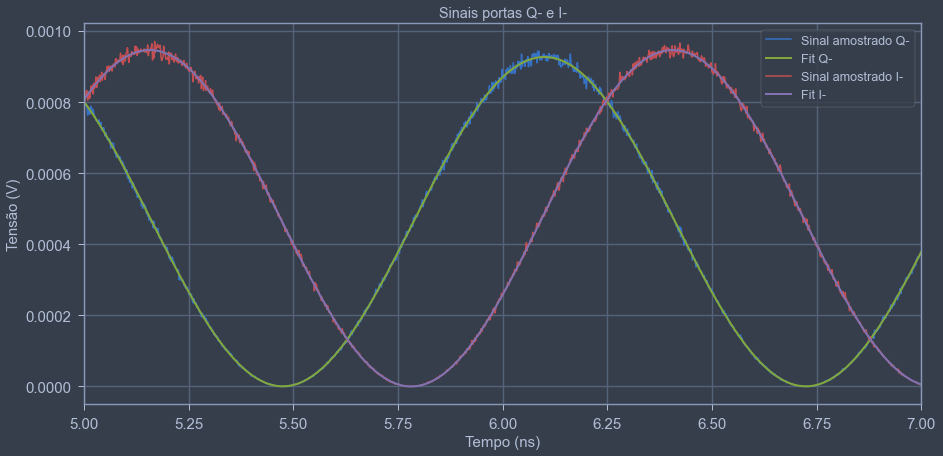

In [15]:
onda = inter.getresult('OSC_1','signal')

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)
print(fit.keys())
plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado Q-')
print(np.sin(2*np.pi*fit['freq']+fit['phase'])+fit['offset'])
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo+fit['phase'])+fit['offset'],linewidth=2,label = 'Fit Q-')


onda = inter.getresult('OSC_3','signal')

tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]

fit = fit_sin(tempo,sinal)
print(fit.keys())
plt.plot(tempo*1e9,sinal,label = 'Sinal amostrado I-')
plt.plot(tempo*1e9,fit['amp']*np.sin(2*np.pi*fit['freq']*tempo+fit['phase'])+fit['offset'],linewidth=2,label = 'Fit I-')

plt.legend()
plt.xlim(5,7)
plt.xlabel(r'Tempo (ns)',fontsize =15)
plt.ylabel(r'Tensão (V)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()
plt.title('Sinais portas Q- e I-')

In [16]:
freq = np.arange(1531,1564)
freqdif = np.linspace(0.01,0.3,50)
PhasedifQ = np.zeros([freq.size,freqdif.size])
PhasedifI = np.zeros([freq.size,freqdif.size])
PhasedifQI = np.zeros([freq.size,freqdif.size])
passo = 1

# Q- Q+
for i in  range(freq.size):
    for j in range(freqdif.size):
        time.sleep(0.05)
        clear_output(wait=True)
        print('passo {} de {}'.format(passo,freq.size*freqdif.size))
        passo += 1
        inter.switchtolayout()
        inter.setnamed('CWL_1','frequency',2.99792458e+17/freq[i])
        inter.setnamed('CWL_2','frequency',2.99792458e+17/(freq[i]+freqdif[j]))
        inter.run()

        onda = inter.getresult('OSC_1','signal')
        tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
        sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]
        fit1 = fit_sin(tempo,sinal)

        onda = inter.getresult('OSC_2','signal')
        tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
        sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]
        fit2 = fit_sin(tempo,sinal)
        if (abs((fit1['phase'])-(fit2['phase']))<np.pi/4):
            PhasedifQ[i][j] = abs((fit1['phase'])-(fit2['phase'])) + np.pi

        else:
            PhasedifQ[i][j] = abs((fit1['phase'])-(fit2['phase']))

        onda = inter.getresult('OSC_3','signal')
        tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
        sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]
        fit1 = fit_sin(tempo,sinal)

        onda = inter.getresult('OSC_4','signal')
        tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
        sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]
        fit2 = fit_sin(tempo,sinal)
        if (abs((fit1['phase'])-(fit2['phase']))<np.pi/4):
            PhasedifI[i][j] = abs((fit1['phase'])-(fit2['phase'])) + np.pi

        else:
            PhasedifI[i][j] = abs((fit1['phase'])-(fit2['phase']))
        
        onda = inter.getresult('OSC_1','signal')
        tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
        sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]
        fit1 = fit_sin(tempo,sinal)

        onda = inter.getresult('OSC_3','signal')
        tempo = np.ndarray.flatten(onda['time'])[int(0.1*onda['time'].size):]
        sinal = np.ndarray.flatten(onda['amplitude (a.u.)'])[int(0.1*onda['time'].size):]
        fit2 = fit_sin(tempo,sinal)
        if (abs((fit1['phase'])-(fit2['phase']))<np.pi/4):
            PhasedifQI[i][j] = abs((fit1['phase'])-(fit2['phase'])) + np.pi

        else:
            PhasedifQI[i][j] = abs((fit1['phase'])-(fit2['phase']))

PhasedifQn = np.zeros([freq.size,freqdif.size])

for i in  range(freq.size):
    for j in range(freqdif.size):
        if (PhasedifQ[i][j]*180/np.pi>200 or PhasedifQ[i][j]*180/np.pi<160):
            try:
               PhasedifQn[i][j] = (PhasedifQ[i][j-1] + PhasedifQ[i][j+1])/2
            except:
                PhasedifQn[i][j] = PhasedifQ[i][j]
        else:
            PhasedifQn[i][j] = PhasedifQ[i][j]


phaseIn = np.zeros([freq.size,freqdif.size])

for i in  range(freq.size):
    for j in range(freqdif.size):
        if (PhasedifI[i][j]*180/np.pi>200 or PhasedifI[i][j]*180/np.pi<160):
            try:
                phaseIn[i][j] = (PhasedifI[i][j-1] + PhasedifI[i][j+1])/2
            except:
                phaseIn[i][j] = PhasedifI[i][j]
        else:
            phaseIn[i][j] = PhasedifI[i][j]



phasedifQIN = np.zeros([freq.size,freqdif.size])

for i in  range(freq.size):
    for j in range(freqdif.size):
        if (PhasedifQI[i][j]*180/np.pi>100 or PhasedifQI[i][j]*180/np.pi<80):
            try:
                phasedifQIN[i][j] = (PhasedifQI[i][j-1] + PhasedifQI[i][j+1])/2
            except:
                phasedifQIN[i][j] = PhasedifQI[i][j]
        else:
            phasedifQIN[i][j] = PhasedifQI[i][j]



passo 1650 de 1650


In [17]:
PhasedifQn = np.zeros([freq.size,freqdif.size])

for i in  range(freq.size):
    for j in range(freqdif.size):
        if (PhasedifQ[i][j]*180/np.pi>200 or PhasedifQ[i][j]*180/np.pi<160):
            try:
               PhasedifQn[i][j] = (PhasedifQ[i][j-1] + PhasedifQ[i][j+1])/2
            except:
                PhasedifQn[i][j] = PhasedifQ[i][j]
        else:
            PhasedifQn[i][j] = PhasedifQ[i][j]


phaseIn = np.zeros([freq.size,freqdif.size])

for i in  range(freq.size):
    for j in range(freqdif.size):
        if (PhasedifI[i][j]*180/np.pi>200 or PhasedifI[i][j]*180/np.pi<160):
            try:
                phaseIn[i][j] = (PhasedifI[i][j-1] + PhasedifI[i][j+1])/2
            except:
                phaseIn[i][j] = PhasedifI[i][j]
        else:
            phaseIn[i][j] = PhasedifI[i][j]



phasedifQIN = np.zeros([freq.size,freqdif.size])

for i in  range(freq.size):
    for j in range(freqdif.size):
        if (PhasedifQI[i][j]*180/np.pi>100 or PhasedifQI[i][j]*180/np.pi<80):
            try:
                phasedifQIN[i][j] = (PhasedifQI[i][j-1] + PhasedifQI[i][j+1])/2
            except:
                phasedifQIN[i][j] = PhasedifQI[i][j]
        else:
            phasedifQIN[i][j] = PhasedifQI[i][j]



In [18]:

linhaQ = np.zeros([freq.size,2])
linhaI = np.zeros([freq.size,2])
linhaQI = np.zeros([freq.size,2])

for i in  range(freq.size):
    popt, pcov = scipy.optimize.curve_fit(linear, freqdif, PhasedifQn[i]*180/np.pi, p0=[0.1,180])
    linhaQ[i][0] = popt[0]
    linhaQ[i][1] = popt[1]

    
for i in  range(freq.size):
    popt, pcov = scipy.optimize.curve_fit(linear, freqdif, phaseIn[i]*180/np.pi, p0=[0.1,180])
    linhaI[i][0] = popt[0]
    linhaI[i][1] = popt[1]

for i in  range(freq.size):
    popt, pcov = scipy.optimize.curve_fit(linear, freqdif, phasedifQIN[i]*180/np.pi, p0=[0.1,90])
    linhaQI[i][0] = popt[0]
    linhaQI[i][1] = popt[1]

In [19]:
scipy.io.savemat('PhasedifQn_N.mat',dict(freqdif=freqdif,freq=freq,PhasedifQn=PhasedifQn))
scipy.io.savemat('phaseIn_N.mat',dict(freqdif=freqdif,freq=freq,phaseIn=phaseIn))
scipy.io.savemat('phasedifQIN_N.mat',dict(freqdif=freqdif,freq=freq,phasedifQIN=phasedifQIN))

Text(0.5, 1.0, 'Interpolação diferença de fase, portas Q, 1530 nm')

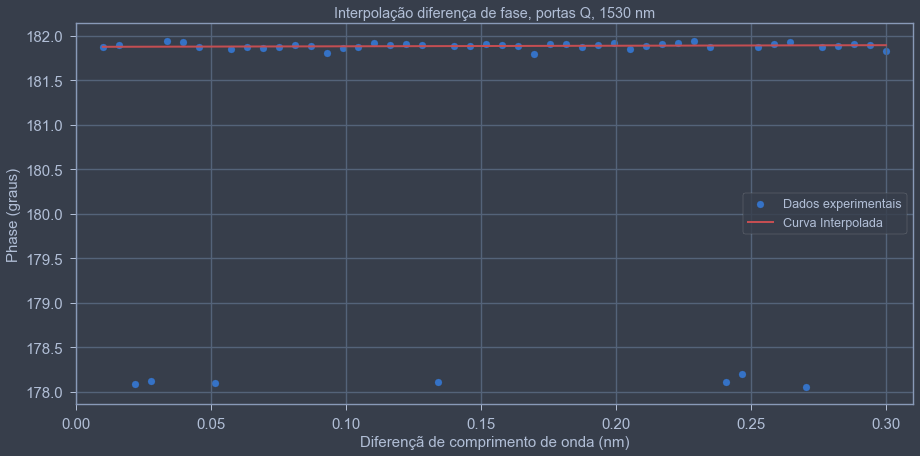

In [23]:
plt.scatter(freqdif,PhasedifQn[0]*180/np.pi,label='Dados experimentais')
plt.plot(freqdif,linear(freqdif,cofQ[0][0],cofQ[0][1])*180/np.pi,'r',label='Curva Interpolada',linewidth=2)
plt.xlim(0,0.31)
plt.xlabel(r'Diferençã de comprimento de onda (nm)',fontsize =15)
plt.ylabel(r'Phase (graus)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()
plt.title('Interpolação diferença de fase, portas Q, 1530 nm')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Diferença de fase, portas Q')

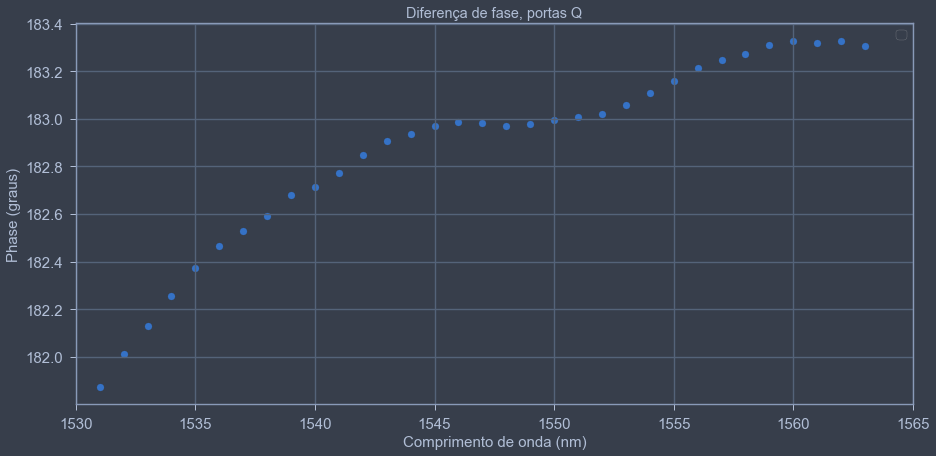

In [24]:
coeficientes = scipy.io.loadmat('coeficientes_N.mat')
cofQ = coeficientes['cofQ']
cofI = coeficientes['cofI']
cofQI = coeficientes['cofQI']

faseQ = cofQ[:,1]
faseI = cofI[:,1]
faseQI = cofQI[:,1]
plt.scatter(freq,faseQ*180/np.pi)

plt.xlim(1530,1565)
plt.xlabel(r'Comprimento de onda (nm)',fontsize =15)
plt.ylabel(r'Phase (graus)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()
plt.title('Diferença de fase, portas Q')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Diferença de fase, portas I')

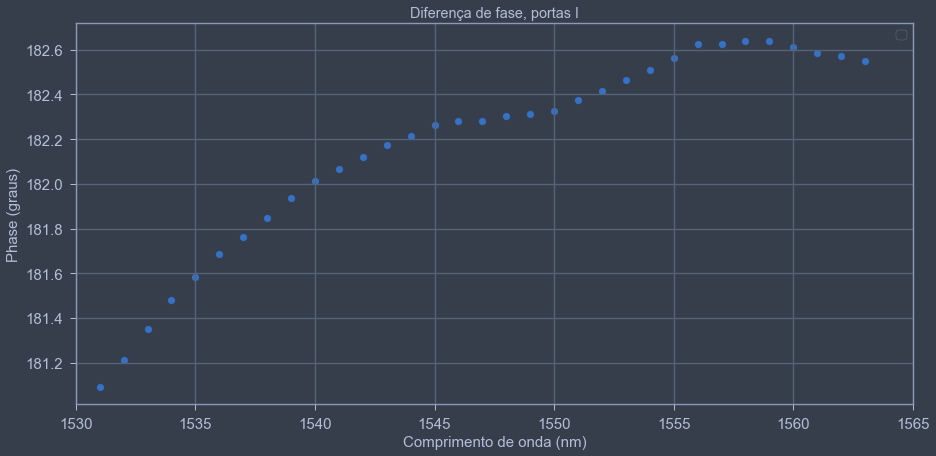

In [25]:
plt.scatter(freq,faseI*180/np.pi)
plt.xlim(1530,1565)
plt.xlabel(r'Comprimento de onda (nm)',fontsize =15)
plt.ylabel(r'Phase (graus)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()
plt.title('Diferença de fase, portas I')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Diferença de fase, portas Q+ e I+')

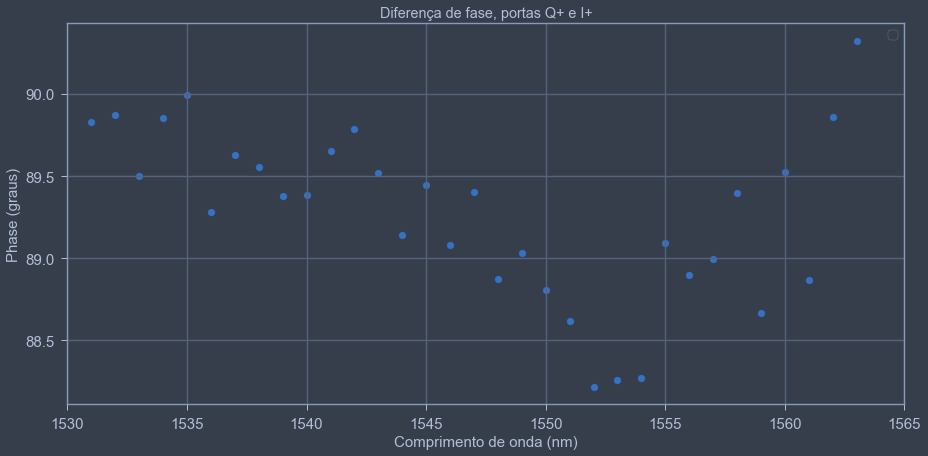

In [26]:
plt.scatter(freq,faseQI*180/np.pi)
plt.xlim(1530,1565)
plt.xlabel(r'Comprimento de onda (nm)',fontsize =15)
plt.ylabel(r'Phase (graus)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()
plt.title('Diferença de fase, portas Q+ e I+')